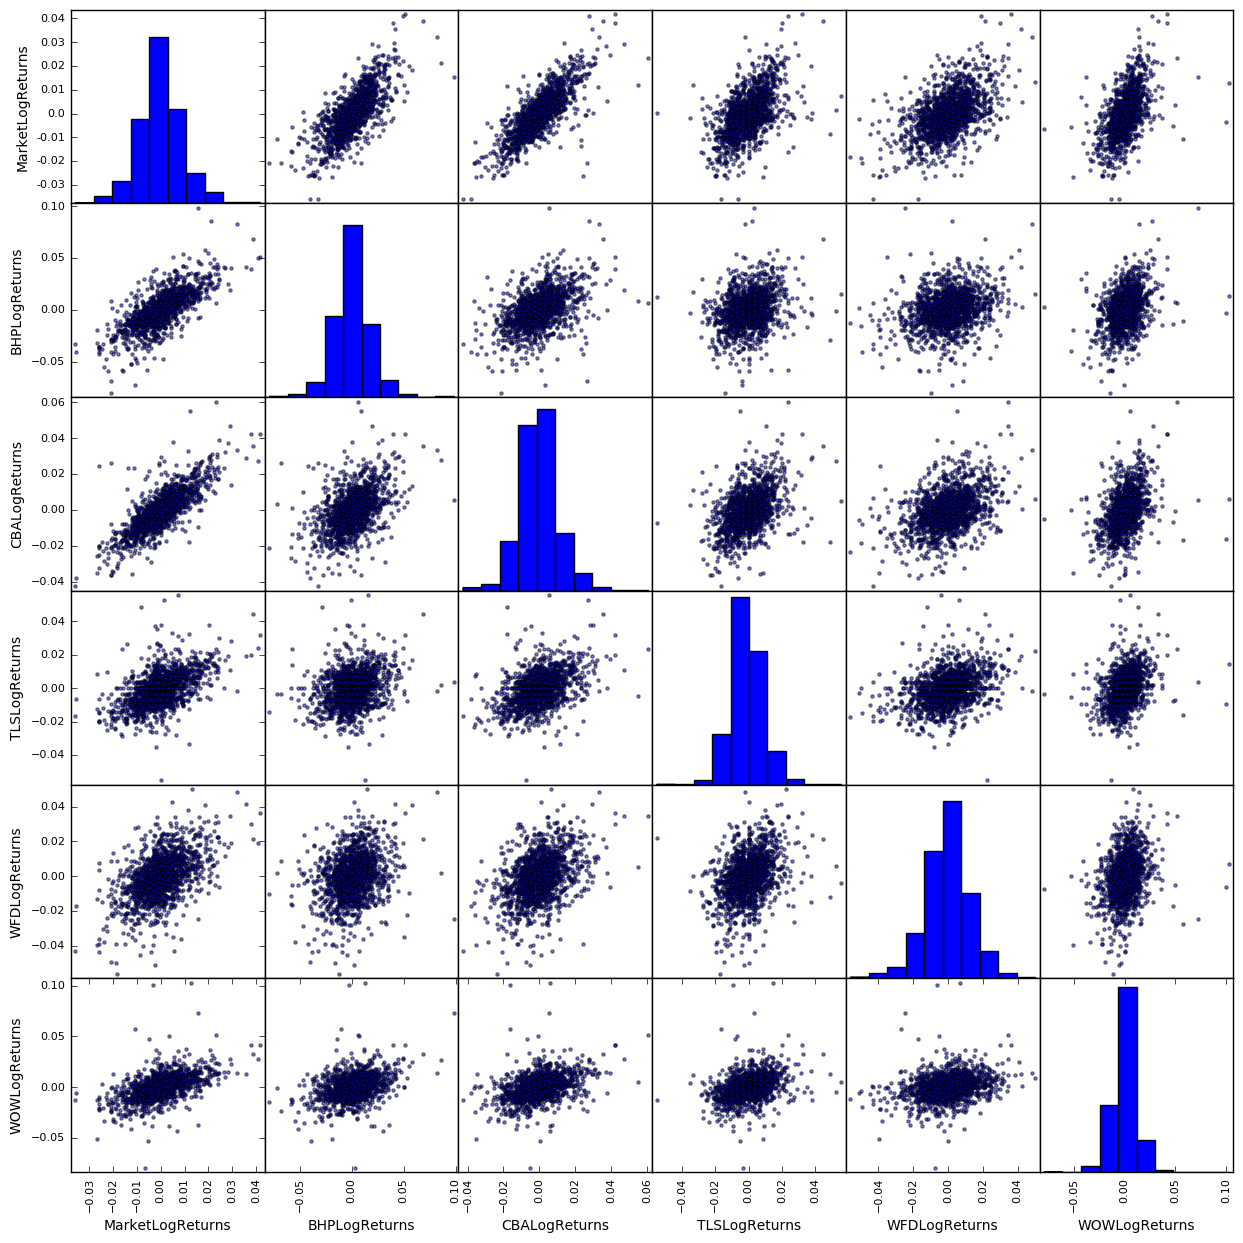

,MarketLogReturns,BHPLogReturns,CBALogReturns,TLSLogReturns,WFDLogReturns,WOWLogReturns
MarketLogReturns,1.000000,0.740156,0.792312,0.534403,0.521306,0.536676
BHPLogReturns,0.740156,1.000000,0.467459,0.269938,0.271081,0.367496
CBALogReturns,0.792312,0.467459,1.000000,0.441894,0.406527,0.404174
TLSLogReturns,0.534403,0.269938,0.441894,1.000000,0.343993,0.343676
WFDLogReturns,0.521306,0.271081,0.406527,0.343993,1.000000,0.278618
WOWLogReturns,0.536676,0.367496,0.404174,0.343676,0.278618,1.000000


In [119]:
# Sriram, Dow Jones & S&P 500

import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

IndexReturns = pd.read_csv('ASX200.csv')
IndexReturns = IndexReturns.drop(IndexReturns.columns[[1, 2, 3, 5, 6]], axis=1) 
IndexReturns.columns = ['Date', 'ASX200']

BHPReturns = pd.read_csv('BHP.csv')
BHPReturns=BHPReturns.drop(BHPReturns.columns[[1, 2, 3, 5, 6]], axis=1)
BHPReturns.columns = ['Date', 'BHP']

CBAReturns = pd.read_csv('CBA.csv')
CBAReturns=CBAReturns.drop(CBAReturns.columns[[1, 2, 3, 5, 6]], axis=1)
CBAReturns.columns = ['Date', 'CBA']

TLSReturns = pd.read_csv('TLS.csv')
TLSReturns=TLSReturns.drop(TLSReturns.columns[[1, 2, 3, 5, 6]], axis=1)
TLSReturns.columns = ['Date', 'TLS']

WFDReturns = pd.read_csv('WFD.csv')
WFDReturns=WFDReturns.drop(WFDReturns.columns[[1, 2, 3, 5, 6]], axis=1)
WFDReturns.columns = ['Date', 'WFD']

#WOWReturns = pd.read_csv('WOW.csv')
#WOWReturns=WOWReturns.drop(WOWReturns.columns[[1, 2, 3, 5, 6]], axis=1)
#WOWReturns.columns = ['Date', 'WOW']

#BHPReturns
#CBAReturns
#TLSReturns
#WFDReturns
##WOWReturns

Market = pd.merge(IndexReturns, BHPReturns)
Market = pd.merge(Market, CBAReturns)
Market = pd.merge(Market, TLSReturns)
Market = pd.merge(Market, WFDReturns)
Market = pd.merge(Market, WOWReturns)

Market

Market['MarketLogReturns'] = np.log(Market.ASX200).diff()
Market['BHPLogReturns'] = np.log(Market.BHP).diff()
Market['CBALogReturns'] = np.log(Market.CBA).diff()
Market['TLSLogReturns'] = np.log(Market.TLS).diff()
Market['WFDLogReturns'] = np.log(Market.WFD).diff()
Market['WOWLogReturns'] = np.log(Market.WOW).diff()

Market=Market.dropna()

LogReturns = Market[['MarketLogReturns','BHPLogReturns', 'CBALogReturns', 'TLSLogReturns', 'WFDLogReturns', 'WOWLogReturns']]



pd.scatter_matrix(LogReturns, figsize=(15,15))



#Market.plot(kind='scatter', x='MarketLogReturns', y='BHPLogReturns')
plt.show()

LogReturns.corr()

In [117]:
# create a fitted model in one line
lm = smf.ols(formula='MarketLogReturns ~ CBALogReturns + TLSLogReturns + WFDLogReturns ', data=Market).fit()

# print the coefficients
lm.params

Intercept        0.000147
CBALogReturns    0.517761
TLSLogReturns    0.168951
WFDLogReturns    0.143487
dtype: float64

In [118]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       MarketLogReturns   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1189.
Date:                Sat, 22 Oct 2016   Prob (F-statistic):               0.00
Time:                        21:01:42   Log-Likelihood:                 5870.0
No. Observations:                1514   AIC:                        -1.173e+04
Df Residuals:                    1510   BIC:                        -1.171e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0001      0.000      1.140      0.254        -0.000     0.000
CBALogReturns     0.5178      0.014     38.222      0.000         0.491     0.544
TLSLogReturns     0.1690      0.014     11.760      0.000         0.141     0.197
WFDLogReturns     0.1435      0.011     12.861      0.000         0.122     0.165
==============================================================================
Omnibus:                      236.678   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1285.812
Skew:                          -0.610   Prob(JB):                    6.16e-280
Kurtosis:                       7.347   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

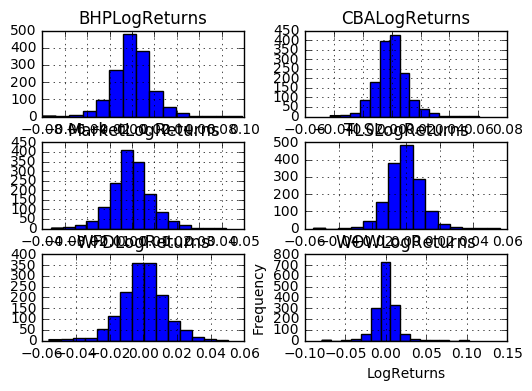

In [115]:
#BHP Log Returns Profile

LogReturns.hist(bins=15)
plt.xlabel('LogReturns')
plt.ylabel('Frequency')
plt.show()
    

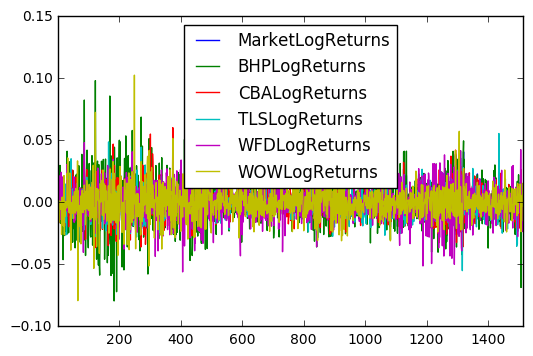

In [127]:
LogReturns.plot(kind = 'line')
plt.show()